# Next steps

- Collect training data

    - Using yahoo tickers, get the daily time series between (today()-13months, today - 1month) for 100 examples. It should be a simple array of size (365,). Also get data after 1 week after end of timeseries.
    - For each array, classify if it is a winner or loser.
    

- Traing imaging neural network
- Test on test set

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from pyts.image import GramianAngularField
from pyts.datasets import load_gunpoint,load_basic_motions
import numpy as np
import datetime
import yfinance as yf
import pandas as pd

# Parameters
X, _, _, _ = load_gunpoint(return_X_y=True)

In [3]:
# Transform the time series into Gramian Angular Fields
gasf = GramianAngularField(image_size=24, method='summation')
X_gasf = gasf.fit_transform(X)
gadf = GramianAngularField(image_size=24, method='difference')
X_gadf = gadf.fit_transform(X)

<ipython-input-4-d8bf14d69725>:17: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  ax.cax.colorbar(im)
c:\users\d91421\miniconda3\envs\finance_ml\lib\site-packages\mpl_toolkits\axes_grid1\axes_grid.py:46: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid1.colorbar module was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use matplotlib.colorbar instead.
  from .colorbar import Colorbar


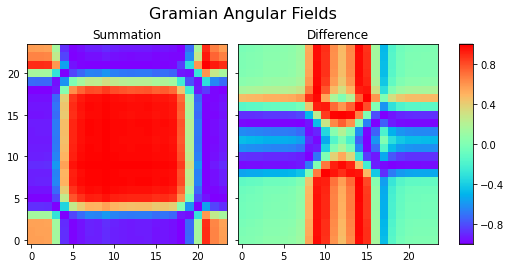

In [4]:
# Show the images for the first time series
fig = plt.figure(figsize=(8, 4))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(1, 2),
                 axes_pad=0.15,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 cbar_pad=0.3,
                 )
images = [X_gasf[-1], X_gadf[1]]
titles = ['Summation', 'Difference']
for image, title, ax in zip(images, titles, grid):
    im = ax.imshow(image, cmap='rainbow', origin='lower')
    ax.set_title(title, fontdict={'fontsize': 12})
ax.cax.colorbar(im)
ax.cax.toggle_label(True)
plt.suptitle('Gramian Angular Fields', y=0.98, fontsize=16)
plt.show()

In [5]:
# Transform the time series into Gramian Angular Fields
gasf = GramianAngularField(image_size=1, method='summation')
X_gasf = gasf.fit_transform(aa)

NameError: name 'aa' is not defined

<ipython-input-9-774e038ac2f1>:17: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  ax.cax.colorbar(im)


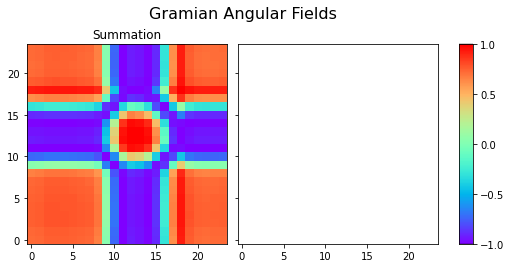

In [9]:
# Show the images for the first time series
fig = plt.figure(figsize=(8, 4))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(1, 2),
                 axes_pad=0.15,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 cbar_pad=0.3,
                 )
images = [X_gasf[0]]
titles = ['Summation', 'Difference']
for image, title, ax in zip(images, titles, grid):
    im = ax.imshow(image, cmap='rainbow', origin='lower')
    ax.set_title(title, fontdict={'fontsize': 12})
ax.cax.colorbar(im)
ax.cax.toggle_label(True)
plt.suptitle('Gramian Angular Fields', y=0.98, fontsize=16)
plt.show()

In [10]:
X2, _, _, _ = load_basic_motions(return_X_y=True)

In [11]:
'''
we would have something like X[n_assets, timeseries], so that:
X[0] = timeseries of google, e.g. from last month - first point is price at 01.09.2020, second is 02.09.2020, and last matches 
yesterday.
X[1] = timeseries from facebook
'''

'\nwe would have something like X[n_assets, timeseries], so that:\nX[0] = timeseries of google, e.g. from last month - first point is price at 01.09.2020, second is 02.09.2020, and last matches \nyesterday.\nX[1] = timeseries from facebook\n'

In [12]:
def get_timeseries(ticker):
    return np.random.random

### Using yahoo data

In [13]:
deltatime = datetime.timedelta(365) #d
start = datetime.date.today() - deltatime
end = datetime.date.today() - datetime.timedelta(1)

In [14]:
#data = yf.download(["SPY","AAPL"], start="2019-01-01", end="2017-04-30",group_by="ticker", threads=4)
data = yf.download(["SPY","AAPL"], start=start, end=end,group_by="ticker", threads=4)

[*********************100%***********************]  2 of 2 completed


In [15]:
# divide today() - 1year - 1 day -> today() - 1day, predict today
# try to predict closing price of today

In [63]:
def get_data_for_ticker(ticker,lookahed=7, previous_days=30):
            
    start_ticker = datetime.date.today() - datetime.timedelta(previous_days) - datetime.timedelta(lookahed)
    end_ticker = datetime.date.today()
    data = yf.download(ticker, start=start, end=end_ticker,group_by="ticker")

    #return data[:-1],data.iloc[-1]
    return data

In [19]:
a,b = get_data_for_ticker('SPY')

[*********************100%***********************]  1 of 1 completed


In [20]:
a.iloc[-1]

Open         3.631300e+02
High         3.631600e+02
Low          3.614800e+02
Close        3.626600e+02
Adj Close    3.626600e+02
Volume       4.533090e+07
Name: 2020-11-25 00:00:00, dtype: float64

In [21]:
b

Open         3.638400e+02
High         3.641800e+02
Low          3.625800e+02
Close        3.636700e+02
Adj Close    3.636700e+02
Volume       2.851410e+07
Name: 2020-11-27 00:00:00, dtype: float64

In [22]:
# now we want to get the image

In [23]:
XXX = a['Close'].values.reshape(-1,1)

In [24]:
# Transform the time series into Gramian Angular Fields
gasf = GramianAngularField(image_size=1, method='summation')
X_gasf = gasf.fit_transform(XXX)

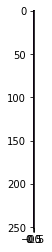

In [25]:
plt.imshow(X_gasf)

In [26]:
X_gasf.shape

(251, 1, 1)

## Generating GAMF from random data

In [27]:
X = np.random.rand(100)
Xres = X.reshape(1, -1)
print (X.shape,Xres.shape)

(100,) (1, 100)


In [28]:
gasf = GramianAngularField(image_size=16, method='s')
X_gasf = gasf.fit_transform(Xres)
print (X_gasf.shape)

(1, 16, 16)


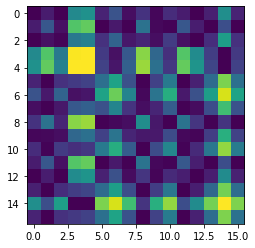

In [29]:
plt.imshow(X_gasf[0])

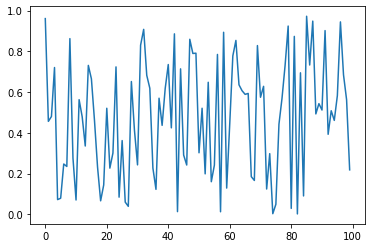

In [30]:
plt.plot(X)
plt.show()

In [31]:
assert X.shape == (len(X),)

In [32]:
def get_gamf_from_time_series(items,image_size=32,method='summation'):
    # prepare items from time series
    assert items.shape == (len(items),)
    Xres = X.reshape(1, -1)
    
    gasf = GramianAngularField(image_size=image_size, method=method)
    X_gasf = gasf.fit_transform(Xres)
    return X_gasf

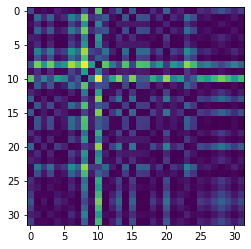

In [34]:
plt.imshow(get_gamf_from_time_series(X)[0])

## Playing with higher dimensions

In [35]:
X = np.random.rand(4,100)
Xres = X.reshape(1, -1)
print (X.shape,Xres.shape)

(4, 100) (1, 400)


In [36]:
gasf = GramianAngularField(image_size=10, method='s')
#X_gasf = gasf.fit_transform(Xres)
X_gasf = gasf.fit_transform(X)
print (X_gasf.shape)

(4, 10, 10)


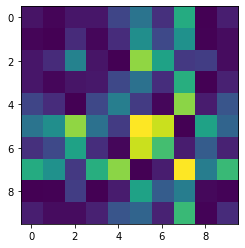

In [37]:
plt.imshow(X_gasf[-1])

In [38]:
def get_gamf_4d_from_time_series(array,image_size=32,method='summation'):    
    
    # array should be e.g. (4,100), i.e. (n_features, n_timestamps)
    gasf = GramianAngularField(image_size=image_size, method=method)
    X_gasf = gasf.fit_transform(array)
    return X_gasf

## Final test with SPY time series

In [58]:
b

Open         3.638400e+02
High         3.641800e+02
Low          3.625800e+02
Close        3.636700e+02
Adj Close    3.636700e+02
Volume       2.851410e+07
Name: 2020-11-27 00:00:00, dtype: float64

In [45]:
#plt.imshow(get_gamf_from_time_series(X)[0])
adj_close_values = a['Close'].values
low_values = a['Low'].values

print (adj_close_values.shape, low_values.shape)

(251,) (251,)


In [56]:
# reshape, show image
#get_gamf_4d_from_time_series()
print (np.vstack([adj_close_values,low_values]).shape)
stacked = np.vstack([adj_close_values,low_values])
image = get_gamf_4d_from_time_series(stacked,method='difference')

(2, 251)


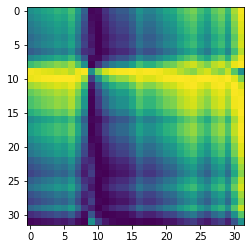

In [57]:
plt.imshow(image[1])

In [105]:
type([1,2,3]) == list

True

# Fine-tuning get_data method

In [107]:
def get_data_for_ticker(ticker, start=datetime.datetime.today(), lookahed_days=7, previous_days=30):
    
    def process_single_df(df):
        #return data[:-1],data.iloc[-1]
        # ToDo - Return data, true/false if increased/decreased, by how much adj close
        data_lookahed = data[data.index >= pd.Timestamp(datetime.datetime.today() - datetime.timedelta(lookahed_days))]
        data_training = data[data.index < pd.Timestamp(datetime.datetime.today() - datetime.timedelta(lookahed_days))]

        # profitable?
        diff = data_lookahed.iloc[-1] - data_training.iloc[-1]
        return (data_training,data_lookahed,diff)
        
    
    # ToDo - Make it work for multiple tickers
    assert type(ticker) == list
    start_ticker = datetime.date.today() - datetime.timedelta(previous_days) - datetime.timedelta(lookahed_days)
    end_ticker = datetime.date.today()
    data = yf.download(ticker, start=start_ticker, end=end_ticker,group_by="ticker")

    if len(ticker)==1:
        data_training,data_lookahed,diff = process_single_df(data)
        return {'ticker':ticker, 
                'data_training':data_training,
                'data_lookahed':data_lookahed,
                'diff':diff}
    
    else:
        for single_ticker in ticker:
            print (f'processing {single_ticker}')
            data_training,data_lookahed,diff = process_single_df(data[single_ticker])
            return {'ticker':single_ticker, 
                'data_training':data_training,
                'data_lookahed':data_lookahed,
                'diff':diff}       
        
    #return (data_training,data_lookahed,diff)

In [80]:
data_training,data_lookahed,diff=get_data_for_ticker('SPY')
data.shape

[*********************100%***********************]  1 of 1 completed


(26, 6)

In [81]:
data_training.shape, data_lookahed.shape, diff

((22, 6),
 (4, 6),
 Open         6.339996e+00
 High         6.459991e+00
 Low          7.329987e+00
 Close        8.340027e+00
 Adj Close    8.340027e+00
 Volume      -4.190320e+07
 dtype: float64)

In [82]:
data_training.tail(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-11-16,360.980011,362.779999,359.589996,362.570007,362.570007,74541100
2020-11-17,359.970001,361.920013,358.339996,360.619995,360.619995,66111000
2020-11-18,360.910004,361.500000,356.239990,356.279999,356.279999,70591300
2020-11-19,355.600006,358.179993,354.149994,357.779999,357.779999,59940900
2020-11-20,357.500000,357.720001,355.250000,355.329987,355.329987,70417300


In [83]:
data_lookahed.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-11-23,357.279999,358.820007,354.869995,357.459991,357.459991,63230600
2020-11-24,360.209991,363.809998,359.290009,363.220001,363.220001,62415900
2020-11-25,363.130005,363.160004,361.480011,362.660004,362.660004,45330900
2020-11-27,363.839996,364.179993,362.579987,363.670013,363.670013,28514100


In [108]:
def get_image_for_adj_close():
    # get data_training
    # get image
    # get label
    #data_training,data_lookahed,diff=get_data_for_ticker(['SPY'])['data_training']
    data_training=get_data_for_ticker(['SPY'])['data_training']
    image = get_gamf_from_time_series(data_training['Adj Close'].values)
    return image, (True if diff['Adj Close'] > 0 else False)

In [109]:
im,label = get_image_for_adj_close()

[*********************100%***********************]  1 of 1 completed


In [113]:
label

True

In [114]:
# next steps - get lots of images by varying start_date - then proceed by using this data (maybe 100 images)